In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

In [3]:
import seaborn as sns
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stocks = input('Enter the code:- ')
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust = True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


In [9]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: xlabel='Date'>

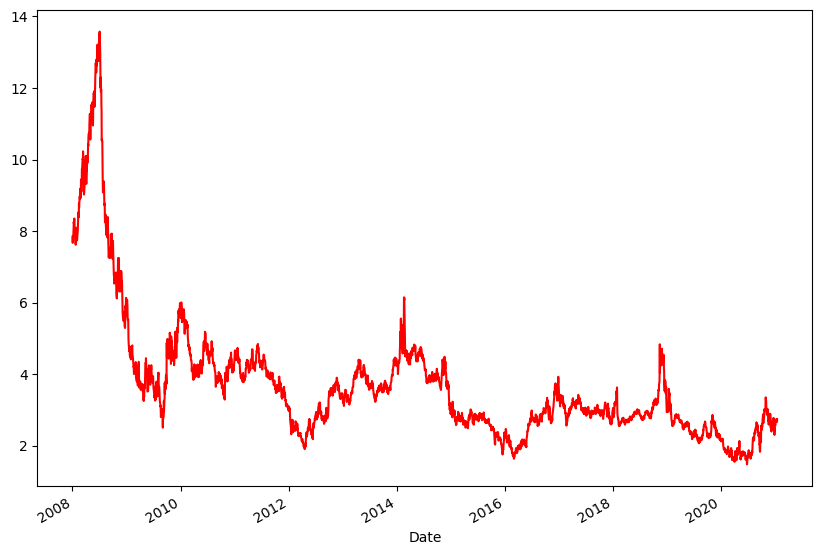

In [13]:
data.Close.plot(figsize =(10,7), color='r')

In [14]:
x = data.drop('Close', axis =1)
y = data['Close']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
avi = LinearRegression()
avi.fit(x_train, y_train)

LinearRegression()

In [20]:
predict1 = avi.predict(x_test)

In [21]:
print(predict1[0], y_test[0])

2.8002552141525996 2.812000036239624


C:\Users\Avinash\AppData\Local\Temp\ipykernel_4848\107484330.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(predict1[0], y_test[0])


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(x,y):
    mse = mean_squared_error(x,y)
    rmse = np.sqrt(mse)
    score = r2_score(x,y)

    print(mse, rmse, score)

calculate_metrics(predict1,y_test)


0.0015345662928876315 0.03917354072441795 0.9994386948357835


In [37]:
from sklearn.linear_model import Ridge, Lasso

In [39]:
avi2 = Lasso()
avi3 = Ridge()
avi2.fit(x_train,y_train)
avi3.fit(x_train,y_train)

Ridge()

In [40]:
predict2 = avi2.predict(x_test)
predict3 = avi3.predict(x_test)

In [41]:
calculate_metrics(y_test,predict2)
calculate_metrics(y_test,predict3)

0.2369233626053286 0.48674774021594447 0.9132831519010187
0.0016151026199614476 0.040188339353118926 0.9994088526896658


In [44]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [45]:
predict4 = svr.predict(x_test)
print(y_test[0],predict4[0])

2.812000036239624 3.071244124386098


C:\Users\Avinash\AppData\Local\Temp\ipykernel_4848\3760285378.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y_test[0],predict4[0])


In [50]:
calculate_metrics(y_test, predict4)

2.389391866579677 1.545765786456563 0.1254533564581818


In [49]:
from sklearn.svm import SVR
svr1 = SVR()

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [99]:
grid.cv_results_

{'mean_fit_time': array([0.19864826, 0.18075786, 0.20535073, 0.20351853, 0.20592899,
        0.24010096, 0.23080821, 0.21980095, 0.23467498, 0.20353675,
        0.26834922, 0.25216088, 0.27860913, 0.28304772, 0.31942544,
        0.26987901, 0.27961483, 0.26999888, 0.34766612, 0.71187725,
        0.27643051, 0.2738358 , 0.26900187, 0.35627413, 2.87081661]),
 'std_fit_time': array([0.0122082 , 0.00660229, 0.0225525 , 0.01609905, 0.00904057,
        0.02271458, 0.03240408, 0.01064216, 0.01726116, 0.01565314,
        0.00705245, 0.00777722, 0.0283771 , 0.01343357, 0.01847953,
        0.01575089, 0.0118414 , 0.01609411, 0.02974717, 0.05660453,
        0.01199786, 0.01753567, 0.00957367, 0.04082686, 0.08093909]),
 'mean_score_time': array([0.08059659, 0.08327045, 0.0790791 , 0.09653115, 0.0857769 ,
        0.07534242, 0.0844902 , 0.08500843, 0.08267026, 0.08188419,
        0.09169888, 0.07646146, 0.07848964, 0.08904991, 0.07632623,
        0.08430786, 0.09032712, 0.0761991 , 0.08548408, 0.08

In [100]:
results = pd.DataFrame(grid.cv_results_)

In [102]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.198648,0.012208,0.080597,0.006501,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-0.074713,-0.069968,-0.072215,-0.072571,-0.049663,-0.067826,0.009205,19
1,0.180758,0.006602,0.083270,0.006317,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.074298,-0.069875,-0.072111,-0.071745,-0.049688,-0.067543,0.009038,18
2,0.205351,0.022553,0.079079,0.007089,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",-0.073415,-0.070039,-0.071562,-0.068957,-0.049078,-0.066610,0.008894,17
3,0.203519,0.016099,0.096531,0.021651,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",-0.065283,-0.064451,-0.063725,-0.060373,-0.046920,-0.060151,0.006822,16
4,0.205929,0.009041,0.085777,0.009321,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",-0.051768,-0.049405,-0.042082,-0.041650,-0.034034,-0.043788,0.006290,15


In [103]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [104]:
grid.best_score_

0.020248011357353678

In [105]:
svr1 = SVR(C= 100, gamma = 0.01, kernel = 'rbf')
svr1.fit(x_train,y_train)

SVR(C=100, gamma=0.01)

In [111]:
predict5 = svr1.predict(x_test)
print(y_test[0],predict5[0])

2.812000036239624 3.76365939765242


C:\Users\Avinash\AppData\Local\Temp\ipykernel_4848\172226672.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y_test[0],predict5[0])


In [98]:
calculate_metrics(y_test, predict5)

2.802747949513064 1.674140958674945 -0.025840024913563964
